In [1]:
import warnings
warnings.filterwarnings('ignore')

import sys
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import Dataset
from scipy.interpolate import griddata
import time
from datetime import date

sys.path.append('/home/ollie/loziel/pyfesom2/codes/py_f2recom_develop/GlobalAssessment/')

sys.path.append('/home/ollie/loziel/pyfesom2/SkillMetrics')
import skill_metrics as sm
import cartopy.crs as ccrs
import pickle

sys.path.append('/home/ollie/loziel/pyfesom2/')
import pyfesom2 as pf
import matplotlib.cm as cm
import cmocean.cm as cmo

In [2]:
!jupyter nbconvert --to=python ../GlobalAssessment/CO2flux_timeseries_python3.ipynb
from CO2flux_timeseries_python3 import CO2flux_timeseries

[NbConvertApp] Converting notebook ../GlobalAssessment/CO2flux_timeseries_python3.ipynb to python
[NbConvertApp] Writing 16976 bytes to ../GlobalAssessment/CO2flux_timeseries_python3.py


In [3]:
runid = 'fesom'

# result paths

resultpath_prespinup = '/work/ollie/ogurses/output_f2r2/spinup_1800_1850/deg_dia_02_deg_phy_02_agg'
resultpath_A_spinup = '/work/ollie/ogurses/output_f2r2/spinup_1800_1850/A_spinup'
resultpath_B_spinup = '/work/ollie/ogurses/output_f2r2/spinup_1800_1850/B_spinup'
resultpath_A = '/work/ollie/ogurses/output_f2r2/spinup_1800_1850/A'
resultpath_B = '/work/ollie/ogurses/output_f2r2/spinup_1800_1850/B_spinup'

resultpath_prespinup_riv = '/work/ollie/loziel/model_output/fesom2.1_recom/B_spinup_riv'
resultpath_B_spinup_riv = '/work/ollie/loziel/model_output/fesom2.1_recom/B_spinup_riv'
resultpath_A_spinup_riv = '/work/ollie/loziel/model_output/fesom2.1_recom/A_spinup_riv'
resultpath_B_riv = '/work/ollie/loziel/model_output/fesom2.1_recom/B_riv'
resultpath_A_riv = '/work/ollie/loziel/model_output/fesom2.1_recom/A_riv'

# export of analysis ------------------------------------------------------------------------------------
today = date.today().strftime("_%Y_%m_%d")

savepath = '/home/ollie/loziel/pyfesom2/outputs/B0112/'
htmlname     =  'comparison_DIN_' + today +'.html'
htmlpath = '/home/ollie/loziel/pyfesom2/outputs/B0112/'
export_html = False

meshpath = '/work/ollie/loziel/mesh/core2_meanz'

# load FESOM mesh -------------------------------------------------------------------------------------
mesh       = pf.load_mesh(meshpath)

/work/ollie/loziel/mesh/core2_meanz/pickle_mesh_py3_fesom2
The usepickle == True)
The pickle file for FESOM2 exists.
The mesh will be loaded from /work/ollie/loziel/mesh/core2_meanz/pickle_mesh_py3_fesom2


# loading time-series

In [12]:
first_year = 1800
last_year  = 1849
years_prespinup = np.arange(first_year,last_year+1)

CO2flux_prespinup_riv = CO2flux_timeseries(runid,resultpath_prespinup_riv,savepath,mesh,first_year,last_year,plotting=False,output=True)
CO2flux_prespinup = CO2flux_timeseries(runid,resultpath_prespinup,savepath,mesh,first_year,last_year,plotting=False,output=True)

In [17]:
first_year = 1850
last_year  = 1957
years_spinup = np.arange(first_year,last_year+1)

CO2flux_B_spinup_riv = CO2flux_timeseries(runid,resultpath_B_spinup_riv,savepath,mesh,first_year,last_year,plotting=False,output=True)
CO2flux_B_spinup = CO2flux_timeseries(runid,resultpath_B_spinup,savepath,mesh,first_year,last_year,plotting=False,output=True)

CO2flux_A_spinup_riv = CO2flux_timeseries(runid,resultpath_A_spinup_riv,savepath,mesh,first_year,last_year,plotting=False,output=True)
CO2flux_A_spinup = CO2flux_timeseries(runid,resultpath_A_spinup,savepath,mesh,first_year,last_year,plotting=False,output=True)

In [18]:
first_year = 1958
last_year  = 2020
years = np.arange(first_year,last_year+1)

CO2flux_B_riv = CO2flux_timeseries(runid,resultpath_B_riv,savepath,mesh,first_year,last_year,plotting=False,output=True)
CO2flux_B = CO2flux_timeseries(runid,resultpath_B,savepath,mesh,first_year,last_year,plotting=False,output=True)

CO2flux_A_riv = CO2flux_timeseries(runid,resultpath_A_riv,savepath,mesh,first_year,last_year,plotting=False,output=True)
CO2flux_A = CO2flux_timeseries(runid,resultpath_A,savepath,mesh,first_year,last_year,plotting=False,output=True)

# plotting time series

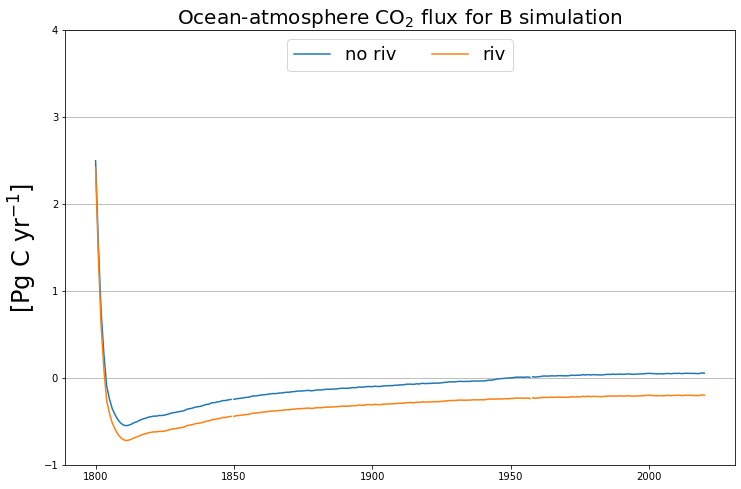

In [20]:
# positive is CO2 uptake, negative is outgassing
fig = plt.figure(figsize=(12, 8), facecolor='w', edgecolor='k')

plt.plot(years_prespinup,CO2flux_prespinup.fco2_global, color='C0',label = 'no riv')
plt.plot(years_prespinup,CO2flux_prespinup_riv.fco2_global, color='C1', label = 'riv')

plt.plot(years_spinup,CO2flux_B_spinup.fco2_global, color='C0')
plt.plot(years_spinup,CO2flux_B_spinup_riv.fco2_global, color='C1')

plt.plot(years,CO2flux_B.fco2_global, color='C0')
plt.plot(years,CO2flux_B_riv.fco2_global, color='C1')

plt.title('Ocean-atmosphere CO$_2$ flux for B simulation',fontsize=20)
plt.ylabel(r'[Pg C yr$^{-1}$]',fontsize=24)
plt.legend(loc='upper center',fontsize=18, ncol=2, labelspacing=1.2)
plt.ylim(-1.0,4.0)
plt.grid(b=None, which='both', axis='y')

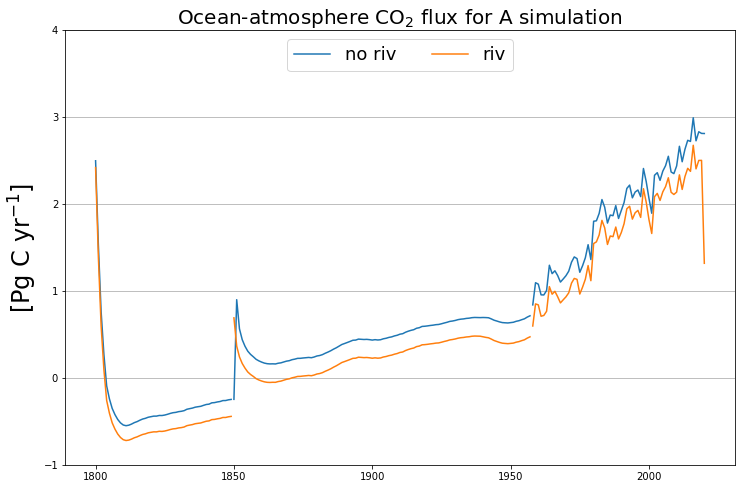

In [21]:
# positive is CO2 uptake, negative is outgassing
fig = plt.figure(figsize=(12, 8), facecolor='w', edgecolor='k')

plt.plot(years_prespinup,CO2flux_prespinup.fco2_global, color='C0',label = 'no riv')
plt.plot(years_prespinup,CO2flux_prespinup_riv.fco2_global, color='C1', label = 'riv')

plt.plot(years_spinup,CO2flux_A_spinup.fco2_global, color='C0')
plt.plot(years_spinup,CO2flux_A_spinup_riv.fco2_global, color='C1')

plt.plot(years,CO2flux_A.fco2_global, color='C0')
plt.plot(years,CO2flux_A_riv.fco2_global, color='C1')

plt.title('Ocean-atmosphere CO$_2$ flux for A simulation',fontsize=20)
plt.ylabel(r'[Pg C yr$^{-1}$]',fontsize=24)
plt.legend(loc='upper center',fontsize=18, ncol=2, labelspacing=1.2)
plt.ylim(-1.0,4.0)
plt.grid(b=None, which='both', axis='y')